In [21]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [22]:
!pip install face_recognition

In [0]:
import PIL.Image
import matplotlib.pyplot as plt 
import PIL.ImageDraw
import face_recognition
from pathlib import Path

In [0]:
 path =Path('/content/drive/My Drive/facedetection')


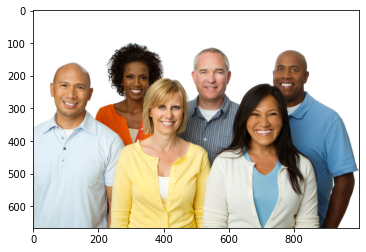

In [71]:
im=plt.imread(path/"people.jpg")
plt.imshow(im)

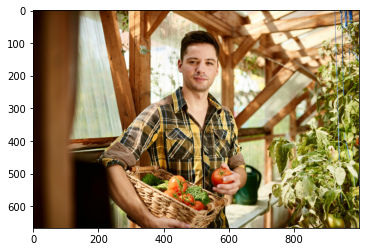

In [73]:
im=plt.imread(path/"person.jpg")
plt.imshow(im)

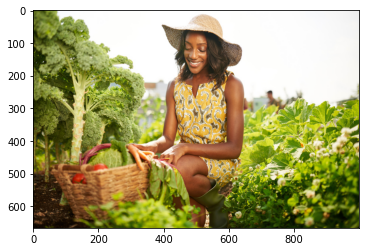

In [75]:
im=plt.imread(path/"person_1.jpg")
plt.imshow(im)

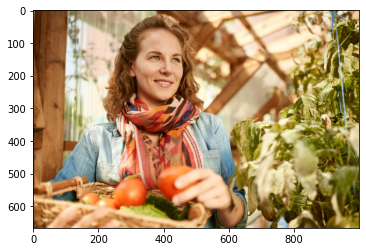

In [76]:
im=plt.imread(path/"person_2.jpg")
plt.imshow(im)

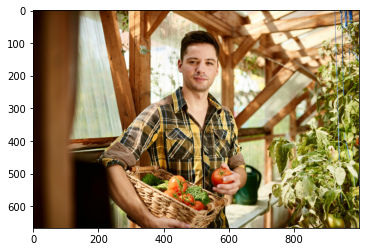

In [77]:
im=plt.imread(path/"person_3.jpg")
plt.imshow(im)

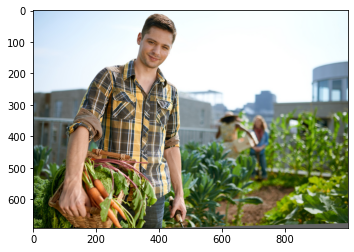

In [78]:
im=plt.imread(path/"unknown_8.jpg")
plt.imshow(im)

In [0]:
def face_detection (path):
  # Load the jpg file into a numpy array
  image = face_recognition.load_image_file(path/"people.jpg")

  # Find all the faces in the image
  face_locations = face_recognition.face_locations(image)

  number_of_faces = len(face_locations)
  print("I found {} face(s) in this photograph.".format(number_of_faces))

  # Load the image into a Python Image Library object so that we can draw on top of it and display it
  pil_image = PIL.Image.fromarray(image)

  for face_location in face_locations:

      # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
      top, right, bottom, left = face_location
      print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

      # Let's draw a box around the face
      draw = PIL.ImageDraw.Draw(pil_image)
      draw.rectangle([left, top, right, bottom], outline="red")


  # Display the image on screen
  plt.imshow(pil_image)


I found 6 face(s) in this photograph.
A face is located at pixel location Top: 163, Left: 497, Bottom: 271, Right: 605
A face is located at pixel location Top: 186, Left: 275, Bottom: 275, Right: 364
A face is located at pixel location Top: 211, Left: 67, Bottom: 319, Right: 175
A face is located at pixel location Top: 295, Left: 653, Bottom: 402, Right: 760
A face is located at pixel location Top: 271, Left: 366, Bottom: 378, Right: 474
A face is located at pixel location Top: 152, Left: 724, Bottom: 259, Right: 832


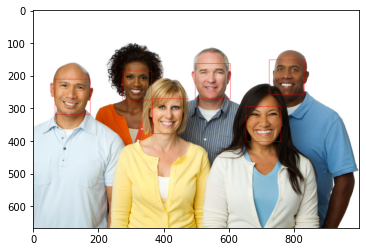

In [52]:
face_detection(path)

In [0]:
def face_landmark(path):
  # Load the jpg file into a numpy array
  image = face_recognition.load_image_file(path/"people.jpg")

  # Find all facial features in all the faces in the image
  face_landmarks_list = face_recognition.face_landmarks(image)

  number_of_faces = len(face_landmarks_list)
  print("I found {} face(s) in this photograph.".format(number_of_faces))

  # Load the image into a Python Image Library object so that we can draw on top of it and display it
  pil_image = PIL.Image.fromarray(image)

  # Create a PIL drawing object to be able to draw lines later
  draw = PIL.ImageDraw.Draw(pil_image)

  # Loop over each face
  for face_landmarks in face_landmarks_list:

      # Loop over each facial feature (eye, nose, mouth, lips, etc)
      for name, list_of_points in face_landmarks.items():

          # Print the location of each facial feature in this image
          print("The {} in this face has the following points: {}".format(name, list_of_points))

          # Let's trace out each facial feature in the image with a line!
          draw.line(list_of_points, fill="red", width=2)

  plt.imshow(pil_image)


I found 6 face(s) in this photograph.
The chin in this face has the following points: [(497, 193), (498, 206), (499, 219), (500, 232), (504, 244), (512, 255), (521, 264), (532, 271), (544, 274), (557, 272), (569, 266), (579, 258), (588, 247), (593, 234), (596, 221), (597, 208), (598, 194)]
The left_eyebrow in this face has the following points: [(508, 186), (514, 182), (520, 179), (528, 179), (536, 181)]
The right_eyebrow in this face has the following points: [(558, 180), (566, 179), (574, 179), (582, 180), (588, 186)]
The nose_bridge in this face has the following points: [(547, 191), (546, 200), (546, 208), (545, 217)]
The nose_tip in this face has the following points: [(536, 221), (541, 223), (546, 225), (551, 223), (556, 221)]
The left_eye in this face has the following points: [(517, 193), (522, 190), (528, 190), (533, 193), (527, 194), (522, 194)]
The right_eye in this face has the following points: [(562, 193), (567, 190), (573, 190), (578, 193), (573, 194), (567, 194)]
The to

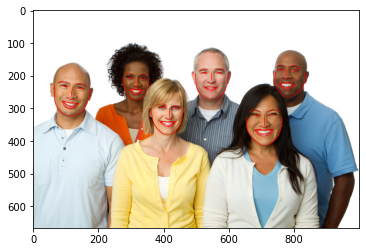

In [55]:
face_landmark(path)

In [0]:
def face_encodings(path):
  # Load the jpg files into numpy arrays
  image = face_recognition.load_image_file(path/"person.jpg")

  # Generate the face encodings
  face_encodings = face_recognition.face_encodings(image)

  if len(face_encodings) == 0:
      # No faces found in the image.
      print("No faces were found.")

  else:
      # Grab the first face encoding
      first_face_encoding = face_encodings[0]

      # Print the results
      print(first_face_encoding)


In [57]:
face_encodings(path)

[-0.20855851  0.01845224  0.05200066 -0.01912927 -0.02748835 -0.01855115
 -0.02725497 -0.0184503   0.19835585 -0.0112457   0.19645664  0.0160067
 -0.15621796 -0.08862408 -0.00915148  0.11604425 -0.12597211 -0.14229296
 -0.03572806 -0.03505833  0.03726118  0.03980888 -0.07782647  0.07926027
 -0.14744228 -0.3470616  -0.10856146 -0.12216781  0.01723715 -0.11650665
  0.06511284 -0.03900211 -0.18297049 -0.10930697  0.06847559  0.12637652
 -0.05037969 -0.09572248  0.13429841 -0.00703449 -0.16005872 -0.05573067
  0.08435321  0.27441847  0.13435344  0.08523722  0.00496128 -0.11246416
  0.16313235 -0.27373844  0.08402453  0.10128954  0.15344827  0.10832103
  0.11609219 -0.09201843  0.07474768  0.25488392 -0.30816695  0.10207553
  0.00198595 -0.01495537  0.03411685 -0.02620055  0.21705674  0.14441346
 -0.11093327 -0.12751678  0.17208101 -0.16183111 -0.04968163  0.12839435
 -0.03207506 -0.26411176 -0.31615111  0.07128874  0.36263996  0.18028149
 -0.13117105 -0.01013261 -0.05811106 -0.00737814  0.

In [0]:
def face_recognitionsystem(path):
  # Load the known images
  image_of_person_1 = face_recognition.load_image_file(path/"person_1.jpg")
  image_of_person_2 = face_recognition.load_image_file(path/"person_2.jpg")
  image_of_person_3 = face_recognition.load_image_file(path/"person_3.jpg")



  # Get the face encoding of each person. This can fail if no one is found in the photo.
  person_1_face_encoding = face_recognition.face_encodings(image_of_person_1)[0]
  person_2_face_encoding = face_recognition.face_encodings(image_of_person_2)[0]
  person_3_face_encoding = face_recognition.face_encodings(image_of_person_3)[0]

  # Create a list of all known face encodings
  known_face_encodings = [
      person_1_face_encoding,
      person_2_face_encoding,
      person_3_face_encoding
  ]

  # Load the image we want to check
  unknown_image = face_recognition.load_image_file(path/"unknown_8.jpg")
  

  # Get face encodings for any people in the picture
  unknown_face_encodings = face_recognition.face_encodings(unknown_image)

  # There might be more than one person in the photo, so we need to loop over each face we found
  for unknown_face_encoding in unknown_face_encodings:

      # Test if this unknown face encoding matches any of the three people we know
      results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6)

      name = "Unknown"

      if results[0]:
          name = "Person 1"
      elif results[1]:
          name = "Person 2"
      elif results[2]:
          name = "Person 3"

      print(f"Found {name} in the photo!")


In [69]:
face_recognitionsystem(path)

Found Person 3 in the photo!
